- ランダムフォレスト （特定の変数のみに絞った）
- データ数　train.csv　5000000
- 　　　　　test.csv　4577465 (全データ）
- submission用csvのidが桁落ち？する

In [1]:
train_kensu = 5000000
#test_kensu = 4577465
test_kensu = 4577465
kensu_str  = '5000000'
submit_csv_name = 'submit_only_certain_variables_' + kensu_str + '.csv'

## 必要なライブラリを読み込む

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


## データ用が多いので、絞って読み込み

In [3]:
train_fname = 'train.csv'
reader = pd.read_csv(train_fname, chunksize=train_kensu)

In [4]:
df_train = reader.get_chunk(train_kensu)

In [5]:
df_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [6]:
df_train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

## Numericalデータの統計情報

In [7]:
df_train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.226596e+18,1.738012e-01,1.410213e+07,1.005004e+03,2.596564e-01,1.028249e+00,2.168640e-01,1.845680e+04,3.195766e+02,5.889961e+01,2.073871e+03,1.663173e+00,1.973460e+02,4.900612e+04,7.814849e+01
std,5.338137e+18,3.789385e-01,3.584213e+01,1.093172e+00,4.730076e-01,5.354494e-01,6.799083e-01,4.660721e+03,2.743879e+01,4.555344e+01,5.681272e+02,1.355842e+00,3.200214e+02,5.004404e+04,6.250221e+01
min,2.052565e+12,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.300000e+01
25%,4.593023e+18,0.000000e+00,1.410211e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.701700e+04,3.200000e+02,5.000000e+01,1.872000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,3.200000e+01
50%,9.226518e+18,0.000000e+00,1.410211e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.995000e+04,3.200000e+02,5.000000e+01,2.229000e+03,2.000000e+00,3.900000e+01,-1.000000e+00,6.100000e+01
75%,1.386271e+19,0.000000e+00,1.410212e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.166500e+04,3.200000e+02,5.000000e+01,2.493000e+03,3.000000e+00,1.690000e+02,1.000840e+05,9.500000e+01
max,1.844673e+19,1.000000e+00,1.410220e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.182200e+04,1.024000e+03,1.024000e+03,2.520000e+03,3.000000e+00,1.835000e+03,1.002480e+05,2.210000e+02


## データの欠損値、型、columnsを確認

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 24 columns):
id                  float64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: float64(1), int64(14), object(9)
memory usage: 915.5+ MB


## Categoricalデータの統計情報

In [9]:
df_train.describe(include=['O']) 

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000,5000000
unique,3034,3668,22,4461,310,31,441691,1275581,6306
top,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,8a4875bd
freq,1842603,1914916,2027232,3157397,3379269,3221761,4029665,26788,292320


In [10]:
df_train['click'].mean()

0.1738012

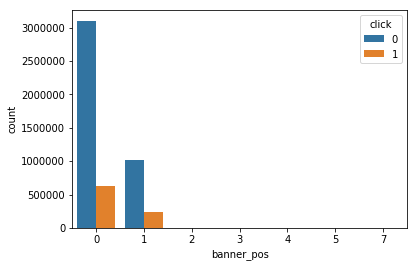

In [11]:
sns.countplot('banner_pos',hue='click',data=df_train)

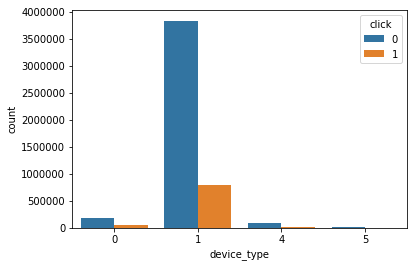

In [12]:
sns.countplot('device_type',hue='click',data=df_train)

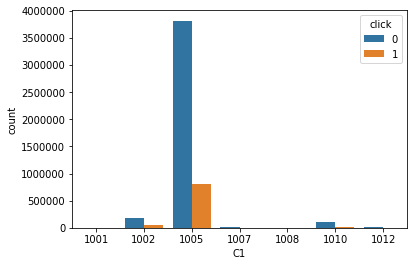

In [13]:
sns.countplot('C1',hue='click',data=df_train)

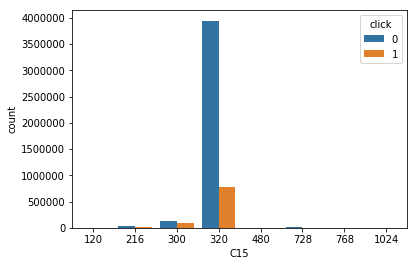

In [14]:
sns.countplot('C15',hue='click',data=df_train)

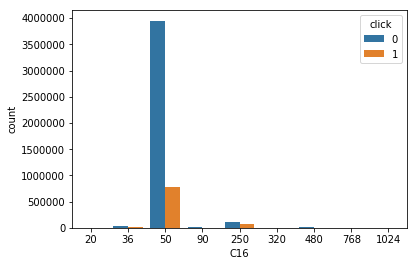

In [15]:
sns.countplot('C16',hue='click',data=df_train)

## ターゲット変数と特徴量を指定してsklearnに渡せるように準備する

In [16]:
target_col = 'click'
exclude_cols = [
'click', 'id', 
'hour',
'banner_pos',
'site_id',
'site_domain',
'site_category',
'app_id',
'app_domain',
'app_category',
'device_id',
'device_ip',
'device_model',
'device_conn_type',
'C14',
'C17',
'C18',
'C19',
'C20',
'C21'
]
X = df_train.copy()
feature_cols = [col for col in X.columns if col not in exclude_cols]

In [17]:
feature_cols

['C1', 'device_type', 'C15', 'C16']

## 説明変数（特徴量）

In [18]:
X[feature_cols].head()

,C1,device_type,C15,C16
0,1005,1,320,50
1,1005,1,320,50
2,1005,1,320,50
3,1005,1,320,50
4,1005,1,320,50


## 被説明変数（ターゲット変数）

In [19]:
X[target_col].head()

0    0
1    0
2    0
3    0
4    0
Name: click, dtype: int64

In [20]:
y = np.array(X[target_col])
X = np.array(X[feature_cols])

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
X

array([[1005,    1,  320,   50],
       [1005,    1,  320,   50],
       [1005,    1,  320,   50],
       ...,
       [1005,    1,  320,   50],
       [1005,    1,  320,   50],
       [1005,    1,  320,   50]])

# モデルの作成

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [24]:
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.3, random_state=1234)

In [25]:
X_train1, X_train2, y_train1, y_train2 = \
 train_test_split(X_train, y_train, test_size=0.3, random_state=1234)

## ランダムフォレスト

In [26]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train1, y_train1)
y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(y_train2, y_pred2)
print('Random Forest RMSE: ', np.sqrt(rf_mse))

Random Forest RMSE:  0.4172358017784599


In [27]:
print(accuracy_score(y_pred2, y_train2,normalize=False))

867210


## 変数増加法で変数選択をしてみる

In [28]:
def get_gfs_feature_indices(X, y, features, clf):
    X_train_, X_test_, y_train_, y_test_ = \
        train_test_split(X, y, test_size=0.3, random_state=1234)
    
    #どの特徴量が何列目にあるかを辞書型で保持
    feature_indices = {feature: idx for idx, feature in enumerate(features)}
   
    # 特徴量をユニークにする
    features = set(features)
    
    # 評価（MSE）の初期化
    last_mse = np.inf
    
    #選ばれた特徴量を保存するための空集合を用意
    chosen_features = set()

    while len(chosen_features) < len(features):
        mse_features = []
        
        # 集合は引き算すると差集合
        for feature in (features - chosen_features):
            candidates = chosen_features.union(set([feature]))
            indices = [feature_indices[feature] for feature in candidates]
            clf.fit(X_train_[:, indices], y_train_)
            y_pred = clf.predict(X_test_[:, indices])
            mse = mean_squared_error(y_test_, y_pred)
            mse_features += [(mse, feature)]
        mse, feature = min(mse_features, key= lambda x:x[0])
        
        if mse >= last_mse:
            break
        last_mse = mse
        print('Newly Added Feature: {},\tRMSE Score: {}'.format(feature, np.sqrt(mse)))
        chosen_features.add(feature)
    return [feature_indices[feature] for feature in chosen_features]

In [29]:
selected_feature_index = \
get_gfs_feature_indices(X=X_train, 
                        y=y_train, 
                        features=feature_cols, 
                        clf=RandomForestRegressor(random_state=1234))

Newly Added Feature: C16,	RMSE Score: 0.37592773813472025
Newly Added Feature: C1,	RMSE Score: 0.37525129614264835
Newly Added Feature: C15,	RMSE Score: 0.37524782041789256
Newly Added Feature: device_type,	RMSE Score: 0.37524626845682285


## 変数選択後の精度を確認

In [30]:
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train1[:, selected_feature_index], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  0.4172358017784599


In [31]:
print(accuracy_score(y_pred2, y_train2,normalize=False))

867210


In [32]:
rf = RandomForestRegressor(random_state=1234)

In [33]:
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]}

In [34]:
import sklearn 
sklearn.__version__

'0.19.1'

In [35]:
#注意: scikit-learnのバージョンが、0.18の場合は、scoring='neg_mean_squared_error'とします
gscv = GridSearchCV(rf, param_grid=params, verbose=1,
                     cv=3, scoring='neg_mean_squared_error')

In [36]:
gscv.fit(X_train1[:, selected_feature_index], y_train1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  9.2min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=1)

In [37]:
gscv.best_params_

{'max_depth': 10, 'n_estimators': 10}

## パラメーターチューニング後のスコア

In [38]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=1234)
rf.fit(X_train1[:, selected_feature_index ], y_train1)
y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(y_train2, y_pred2)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  0.4172358017784599


In [39]:
print(accuracy_score(y_pred2, y_train2,normalize=False))

867210


## テストデータへ適用して精度を確認する

In [40]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=1234)
rf.fit(X_train[:, selected_feature_index], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

In [41]:
y_pred_on_test = rf.predict(X_test[:, selected_feature_index])
rf_mse = mean_squared_error(y_test, y_pred_on_test)
print('RandomForest RMSE: ', np.sqrt(rf_mse))

RandomForest RMSE:  0.41620748031080207


In [42]:
print(accuracy_score(y_pred2.round(), y_train2,normalize=False))

867210


## submission用csvの作成

In [43]:
test_fname = 'test.csv'
reader_test = pd.read_csv(test_fname, chunksize=test_kensu)
# 件数が多くなるとidの形式が1.09000となる
df_test_origin = reader_test.get_chunk(test_kensu)

In [44]:
selected_feature_index2 = [
'C16',
'C1',
'C15',
'device_type'
]

In [45]:
#submit_data =  pd.Series(rf.predict(df_test_origin[selected_feature_index2]), name='click', index=df_test_origin['id'])

submit_data =  pd.Series(rf.predict(df_test_origin[selected_feature_index2]), name='click', index=df_test_origin['id'].astype(str))
submit_data.to_csv(submit_csv_name, header=True)

In [46]:
submit_data
#df_test_origin['id'].astype('str')

id
1.0000174058809264e+19    1
1.0000182526920856e+19    1
1.0000554139829213e+19    1
1.00010946378098e+19      1
1.0001377041558671e+19    1
1.0001521204153354e+19    1
1.0001911056707023e+19    1
1.0001982898844213e+19    1
1.0002000217531288e+19    1
1.0002107385290586e+19    1
1.0002121728305926e+19    1
1.0002246330438765e+19    1
1.0002274319697023e+19    1
1.0002614093820008e+19    1
1.0003085473872234e+19    1
1.0003460544097147e+19    1
1.0003655272218038e+19    1
1.0003886426122211e+19    1
1.0003962554013592e+19    1
1.0004028101361908e+19    1
1.0004147501365764e+19    1
1.0004218627354024e+19    1
1.0004594809490024e+19    1
1.0004595231242658e+19    1
1.000484486711088e+19     1
1.000488214903887e+19     1
1.0004964724620896e+19    1
1.0005270909407257e+19    1
1.0005321853961183e+19    1
1.0005377878485193e+19    1
                         ..
9.992570319139172e+18     1
9.992804326900345e+18     1
9.993024933465636e+17     1
9.993108024312566e+18     1
9.993142888242237

#### idが正しいidで登録作成できない。桁落ち？している

In [47]:
! head -5 test.csv

In [48]:
! tail -5 test.csv